<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ntv_rich       22 non-null     float64
 1   area           22 non-null     float64
 2   latitude       22 non-null     float64
 3   dist_mainland  22 non-null     float64
dtypes: float64(4)
memory usage: 832.0 bytes


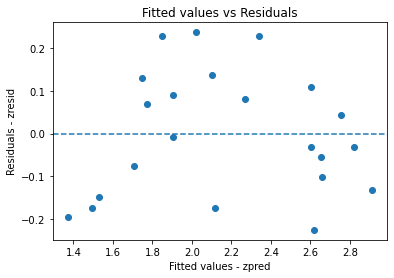

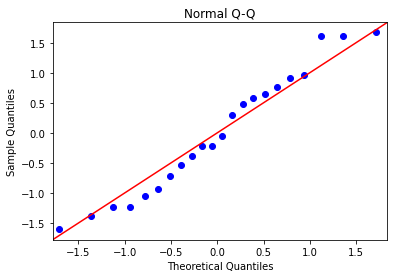

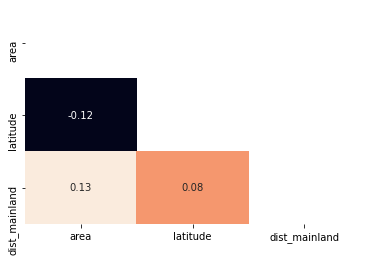

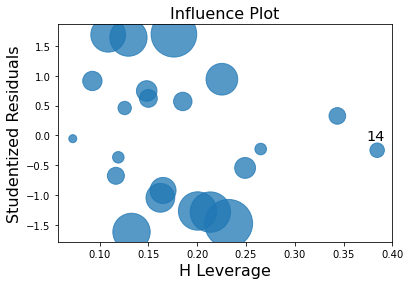

MSE train =  0.02031039822439179
RMSE train=  0.14251455443003633
MSE test =  0.05876905588800059
RMSE test=  0.24242329897928663
RSquared test=  0.38687717756912476


C:\Users\Leticia\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Leticia\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [1]:
### Multilinear Regression in Python

#%%
# Data Source: McMaster, R. T. (2005). Factors influencing vascular plant diversity on 22 islands off the coast of eastern North America. Journal of Biogeography, 32(3), 475-492.

# Things to note in the Model Summary:
#   R – Correlation coefficient - Can be used as an effect size; the meaningfulness of the effect.
#   R Square – Variance explained by predictors
#   F significqance (<.05) = the significance for the whole model.
#   T significance  (<.05) = significance for the coefficient.



# Assumptions that must be checked before using Multiple Linear Regression

# 1) The Linearity Condition - There is no relationship between the residuals and the variable; 
#       The errors should not influence each other and create a pattern. No connection between Y's.
#       Fitted vs Residuals plot - To check for this condition we a scatterplot using ZRESID (the standardized residuals) / ZPRED (standardized predicted values)


# 2) The Autocorrelation Condition - There is no relationship between the residuals and the variable; 
#       The errors should not influence each other and create a pattern. No connection between Y's.
#       Durbin-Watson (Should be between 1-3) – Check the Durbin-Watson in the Model Summary to ensure the errors are independent.


# 3) Normality (No Pattern) of errors - The residuals must be approximately normally distributed. 
#     These are indications of abnormal data.
#    Scatter plot: To check for this condition use the ZRESID (the standardized residuals, or errors / ZPRED (the standardized predicted values) plot.
#     Q-Q plot (normal) - Regression Standardized Residuals - The plots should reside close to the line but indicate no pattern.


# 4) The Multicollinearity Condition - No Perfect - linear relationship between 2+ predictors
#      The independent variables should not be correlated to each other aka should not influnece each other.
#      Coefficients - To check for multicollinearity, check the average of the VIF value. Around 1 is good and suggests no collinearity.
#      5-10 is high collinearity.  


# 5)  Homoscedasticity -  We do not want the variance of the residuals to be the same for all values of X, or a pattern. 
#       If the plot looks like a cone shape or a tube it's a sign of homoscedasticity and there's an issue. 
#       Plot - To check for this condition we use a scatterplot using ZRESI ZRESID (the standardized residuals, or errors / ZPRED (the standardized predicted values)


# 6) The Extreme Outlier Condition - Any extreme outliers should be removed to eliminate the possibility of influence on the data. 
#        Models should be run with and without outliers and compared.
#        Cook’s distance - It is how far a datapoint is from the normal data points.


# Start by importining ther basic packages you will need,
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Next, import the dataset. 
url = "https://raw.githubusercontent.com/silentfieldconsulting/MLDATA/main/plant_richness.csv"
df =  pd.read_csv(url, index_col= False )
df.head(2)

# Next is data inspection - check your data and get familiar with its contents.
df.head()
df.shape
df.info()
df.describe().round(2) #rounding two decimals.

# Lastly, subset your columns to X's and y variables
X = df[['area', 'latitude', 'dist_mainland']]   # independent variables
y = df[['ntv_rich']]   # dependent variables


# Now we can check the assumptions

# Condition 1- Linearity - Check this assumption by examining a scatterplot of x and y for a linear relationship with no curves.
#     Fitted vs Residuals plot - To check for this condition we a scatterplot using ZRESID (the standardized residuals) / ZPRED (standardized predicted values)
#     This plot also used to check for: linearity, homoscedasticity of errors, normality of errors, outliers.


# Use statsmodels
# Constant is added by the model unless you are using formulas like we did in the linear regression example
X = sm.add_constant(X)
#Next, fit the regression model. Use the ols function in the statsmodels package to best fit the line and create your model.

m1 = sm.OLS(y, X).fit()
m1.summary()


# Create fitted values (zpred) vs residuals (zresid) scatter plot. Label your variables.
plt.scatter(x=m1.fittedvalues, y=m1.resid)
plt.xlabel('Fitted values - zpred')
plt.ylabel('Residuals - zresid')
plt.title('Fitted values vs Residuals')
# Create a horizontal line through yyour plot.
plt.axhline(y=0, linestyle='--')
plt.show()


# Condition 3 -  Normality of errors - The residuals must be approximately normally distributed.
#  If this condition is not met the regression may still be run as regression is robust to the normailty condition. 
#  Q-Q plot (normal): Regression Standardized Residuals - point should be close to the line with no pattern.
#  Normally we would create a fitted vs standardized residuals plot to check for this assumption, but we already did that for condition 1.


#Import the gofplots to get your qqploy function from the statsmodel package. Use your model's residuals, fit the line, and add the 45 degree line.
from statsmodels.graphics import gofplots
gofplots.qqplot(m1.resid, fit=True, line='45')
plt.title('Normal Q-Q')
plt.show()

#  Condition 5 - Homoscedasticity - Equal variances
#   This method is somewhat robust to violation of equal variance and the model may work without meeting the assumption.
#   Develop a scatterplot of “residuals versus fits” - Check for no patterns, funnels, or cones.
#   Normally we would create a fitted vs standardized residuals plot to check for this assumption, but we already did that for condition 1.



#  Condition 2 - Autocorrelation  - There is no relationship between the residuals and the variable; 
#       Durbin-Watson (Should be between 1-3) – Check the Durbin-Watson in the Model Summary to ensure the residuals are independent without correlation to each other.
#       Linear Model with a Single Predictor
m1.summary()



# Condition 4 - Multicollinearity and using the  Variance inflation factor (VIF).
#  Multicollinearity (the significant correlation among the X variables) is often a problem. Multicollinearity results in an inflation of variance and, changes in the signs and confidence intervals of regression coefficients (Ryan, 2008).
#  This in turn effects the models predictive accuracy and must be eliminated.  We check for multicollinearity by analyzing correlations or using the VIF.
#  VIF values around 1 indicate no multicollinearity, 5-10 suggests multicollinearity is present. 10> is a huge red flag for mulitcollinearity.
#  For correlation analysis the coefficent must be >.05 to indicate multicollinearity.
#  To remove the multicollinearity you can either take more measurements or remove the variables causing multicollinearity or perform the ridge regression (Ryan, 2008).

# Variance Inflation Factor (VIF)
# Import the VIF function from the respective statsmodel package. Add your intercept (constant) in X using add_constant(X).
# Create your pandas dataframe to get the VIF values for your X's.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_m1 = pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
vif_m1

# Next, investigate  correlation coefficients for multicollinearity. In this example, we'll create a heatmap to help visualize the relationship between our IV's.
# We'll create a dataframe, use the corr function, and use seaborn to plot our heatmap. 
# Over .7 could suggest multicollinearity.
import seaborn as sns
sat_df_corr = df[['area', 'latitude', 'dist_mainland']].corr()
sat_df_corr
sns.heatmap(sat_df_corr, annot=True, fmt=".2f", mask=~np.tri(sat_df_corr.shape[1], k=-1, dtype=bool),cbar=False)
plt.show()


# Condition 6 - No extreme outliers.

# Values of Cook’s distance that are greater than 4/N (in this case, 4/40 = .10) may be problematic.
# Number of indepdent variables/ number of observations.

# Create an influence plot using the statsmodel package. Define your X, confidence level, and which observation criteria you're using.
sm.graphics.influence_plot(m1, alpha  = 0.05,  criterion="cooks")
plt.show()

#Now, how do you remove outliers you found in the influence plot?
df = df.drop([14])
#Remove influential observations one at a time and rerun regression (and make sure any multicollinearity as been removed by this point)


# After checking our data meets all our assumptions, let's start building our model.
# To split the dataset into the Training set and Test sets use the sklearn.model package and import the train_test_split.

# First, re-subset your X's (you may have removed an IV by this point due to multicollinearity)
# Next, label your X's and y's and set how much of the data you would like to leave untouched for the test set (20% in this example)
X = df[['area', 'latitude', 'dist_mainland']]   # Independent variables
y = df[['ntv_rich']]   # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Develop your training set regression model using a constant function.
X_train_con = sm.add_constant(X_train)
# Fit the OLS regression model and analyze the summary
mtrain1 = sm.OLS(y_train, X_train_con).fit()
mtrain1.summary()
#Check if the model is omnibus (overall signficiant) by checking the F-static's significance level.

# Reduce the model - check the P value of the T's for the coefficients of your variables to find non-significant coefficients to eliminate.
# Update regression model by redefining X's and y's to drop unwanted non-significant variables.
X = df[['area', 'latitude']]   # independent variables
y = df[['ntv_rich']]   # dependent variables

# Re-split data and re-train model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Re-develop your training set regression model using a constant function.
X_train_con  = sm.add_constant(X_train)

# Re-fit the OLS regression model, set as new variable, and re-analyze the summary for significance.
mtrain2 = sm.OLS(y_train, X_train_con ).fit()
mtrain2.summary()



# Lastly, evaluate your model. 
# We're looking for an R-squared of 75> for our model depending on business needs.
# We'll also check the root mean square error(RMSE) for the performance of our model.
# If our RMSE value decreasses after dropping out non-significant IV, it's a sign our model performance will improve.
# However, if the RMSE of our train is vastly lower than our test set we have overfit our model and is not accurate for predictions when used in the real world.
# Ideally we are looking for similar RMSE numbers of our training and test set to signify a good model.


# Use train/test split with RMSE to see whether certain variables should be kept in the model:
# We'll use the sklearn way to split our test and train data get our MSE and RMSE values.


# To start our final evaluation, instantiate model.
lm1 = LinearRegression()

# Fit our final instantiated model with the train variables.
lm1.fit(X_train, y_train)


#RMSE on training side
# Predict
y_pred_train= lm1.predict(X_train)
# Use the mean_squared_error function to get the MSE on train dataset.
mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE train = ", mse_train)

# Then, get the squareroot on your MSE to get the RMSE. This value indicates what the mean error in prediction of your y variable is.
RMSE_train =   np.sqrt(mse_train)
print("RMSE train= ", RMSE_train )



#RMSE on test side
# Predict

# Insert your test variable intro your predictive function of your final model to get your predicted y.
y_pred_test= lm1.predict(X_test)

# Use the mean_squared_error function to get the MSE on test dataset.
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE test = ", mse_test)

# Then, get the squareroot on your MSE to get the RMSE. This value indicates what the mean error in prediction of your y variable is. 
RMSE_test =   np.sqrt(mse_test)
print("RMSE test= ", RMSE_test )

# Lastly, RSquared will tell you how much of the variation of your predicted y is explaned by the X if you have not already checked.
RSquared = r2_score(y_test, y_pred_test)
print("RSquared test= ", RSquared )


